In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
import pylab

# You might also need to install numpy. Same thing:
# pip install numpy
import numpy as np

# A note on Overfitting

As we have seen when we talked about dataset splits, one of the main goals of applying Machine Learning methods to our data is to be able to generalize well. In that case, we decided to split our data into a _training set_ and a _test set_ and our idea was to use the test set to see if the learning algorithm would be able to output meaningful values (values that "made sense") also when given input that it had never seen before, while learnings.

When the algorithm works really well on the training set, but really badly in the test set, we have the problem of _overfitting_. Let's take a look at an example.

## Fitting data with polynomials

In the previous week, we saw how we could fit a line to our dataset. Our line followed the equation $y = Ax + b$, and our goal was to find a line that was as close as possible to the data points we had. Of course, you can fit a line as long as you have only two points: all the other points are superfluous, and only make the problem as little harder.

It turns out that a line is a very simple polynomial, and any polynomial can be fit with as many points as its degree. For example, the polynomial $y = ax^4 + bx^3 + cx^2 + dx + e$ can be fit as long as you have 5 points.

We won't go into too much details here about how this is done. It doesn't really matter for us  (and anyway, [this method is super old](https://en.wikipedia.org/wiki/Lagrange_polynomial)). What does matter, however, is how these polynomials look like. Let's fit a simple polynomial, just to see how this is done in Python using scipy.

    (This first example was taken from: )
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html

In [2]:
# First let's define our datapoints. We can start by creating the points
# (0, 0), (1, 1), (2, 8)
#
# Make sure you understand what is going on in the following two code lines
# proceeding
x = np.array([0, 1, 2])
y = x**3

In [3]:
# Now we import the function that does the fitting
from scipy.interpolate import lagrange

# To call it, we just give the x and y values:
poly = lagrange(x, y)

In [4]:
# The output of the function are the coefficients "a", "b" and "c" of
# our polynomial.
poly

poly1d([ 3., -2.,  0.])

In this case, the polynomial that it found is the polynomial $y = 3x^2 -2x + 0$. Let's plot it...

In [5]:
# First we define the curve (we actually define a lot of x and y positions in the curve)
x_curve = np.linspace(-3, 3, 100)
y_curve = 3*x_curve**2 + -2*(x_curve)

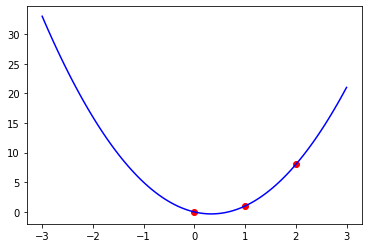

In [6]:
# And then we plot
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_curve, y_curve, 'b')

## But what if my data is noisy?

As you can see, this polynomial fitting of the curve is "perfect": the function we find passes through all the points in our data. Now I want to show you what it would do with the noisy data from our previous class.

Let's redefine our data below...

In [14]:
# Generates some fictitious data

columns = ["gender",
           "mean_pupil_dilation",
           "total_reading_time",
           "num_fixations"]

data = [
    ['F',  0.91,  111,  19],
    #['M',  0.90,  120,  20],
    ['F',  0.89,  101,  18],
    ['M',  0.79,  104,  24],
    ['F',  0.77,   95,  20],
    #['F',  0.63,   98,  22],
    #['M',  0.60,   80,  23],
    ['M',  0.56,   77,  30],
    #['M',  0.55,   67,  56],
    #['F',  0.54,   63,  64],
    ['M',  0.45,   59,  42],
    ['M',  0.44,   57,  43],
    ['F',  0.40,   61,  51],
    ['F',  0.39,   66,  40]
]

test_data = [
    ['M',  0.87,  102,  17],
    ['F',  0.74,  101,  12],
    ['M',  0.48,   65,  52],
    ['F',  0.36,   54,  44]
]

And just as we did in the previous class, let's plot `mean_pupil_dilation` along with `total_reading_time`:

mean_pupil_dilation [0.91 0.89 0.79 0.77 0.56 0.45 0.44 0.4  0.39]
total_reading_time [111. 101. 104.  95.  77.  59.  57.  61.  66.]


(15.0, 125.0)

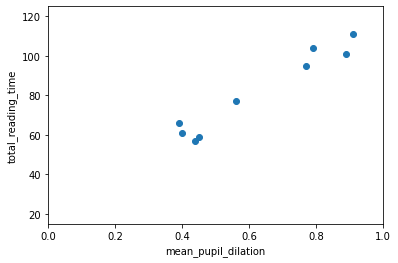

In [15]:
# Gets the data
mean_pupil_dilation = np.array(data)[:, 1].astype('float32')
total_reading_time  = np.array(data)[:, 2].astype('float32')

# Let's show the data here too
print("mean_pupil_dilation", mean_pupil_dilation)
print("total_reading_time", total_reading_time)

# Creates the canvas
fig, axes = plt.subplots()

# Really plots the data
axes.plot(mean_pupil_dilation, total_reading_time, 'o')

# Puts names in the two axes (just for clearness)
axes.set_xlabel('mean_pupil_dilation')
axes.set_ylabel('total_reading_time')


pylab.xlim([0,1])
pylab.ylim([15, 125])

Ok... it looks like we have the same data as in the previous class. We can clearly see that there is an upward "trend" in this data, such that, as `mean_pupil_dilation` increases, the `total_reading_time` also increases. This data was generated (it was manually produced -- this is NOT real data) with this idea in mind.

> **Note:** notice that I eliminated a few of the data points because the `lagrange` implementation is quite numerically unstable, and it was outputting nonsense when I gave it too many data points. Still, I think it is quite clear that our data should be a line.

Now... what if we tried using our fancy polynomial method to fit this data? Let's take a look:

In [16]:
poly = lagrange(mean_pupil_dilation, total_reading_time)

In [17]:
# Notice the many many coefficients. This is because we had very many points.
# I hope it is already quite clear what is going to happen
poly

poly1d([ -1397640.8840121 ,   9982272.59458733, -27805885.89465904,
        40974655.44573021, -35543090.33265066,  18749964.34840298,
        -5902468.14846241,   1016355.63905811,    -73307.51827418])

In [21]:
# Then we write the curve.
#
# Below, I took the coefficients from the "poly" variable above and inserted as
# coefficients in our polynomial.
x_curve = np.linspace(0, 1, 10000)
y_curve = \
         (x_curve**8)  * -1397640.8840121 + \
         (x_curve**7)  *  9982272.59458733 + \
         (x_curve**6)  * -27805885.89465904 + \
         (x_curve**5)  *  40974655.44573021 + \
         (x_curve**4)  * -35543090.33265066 + \
         (x_curve**3)  *  18749964.34840298 + \
         (x_curve**2)  * -5902468.14846241 + \
              x_curve  *  1016355.63905811 + \
                         -73307.51827418

(10.0, 150.0)

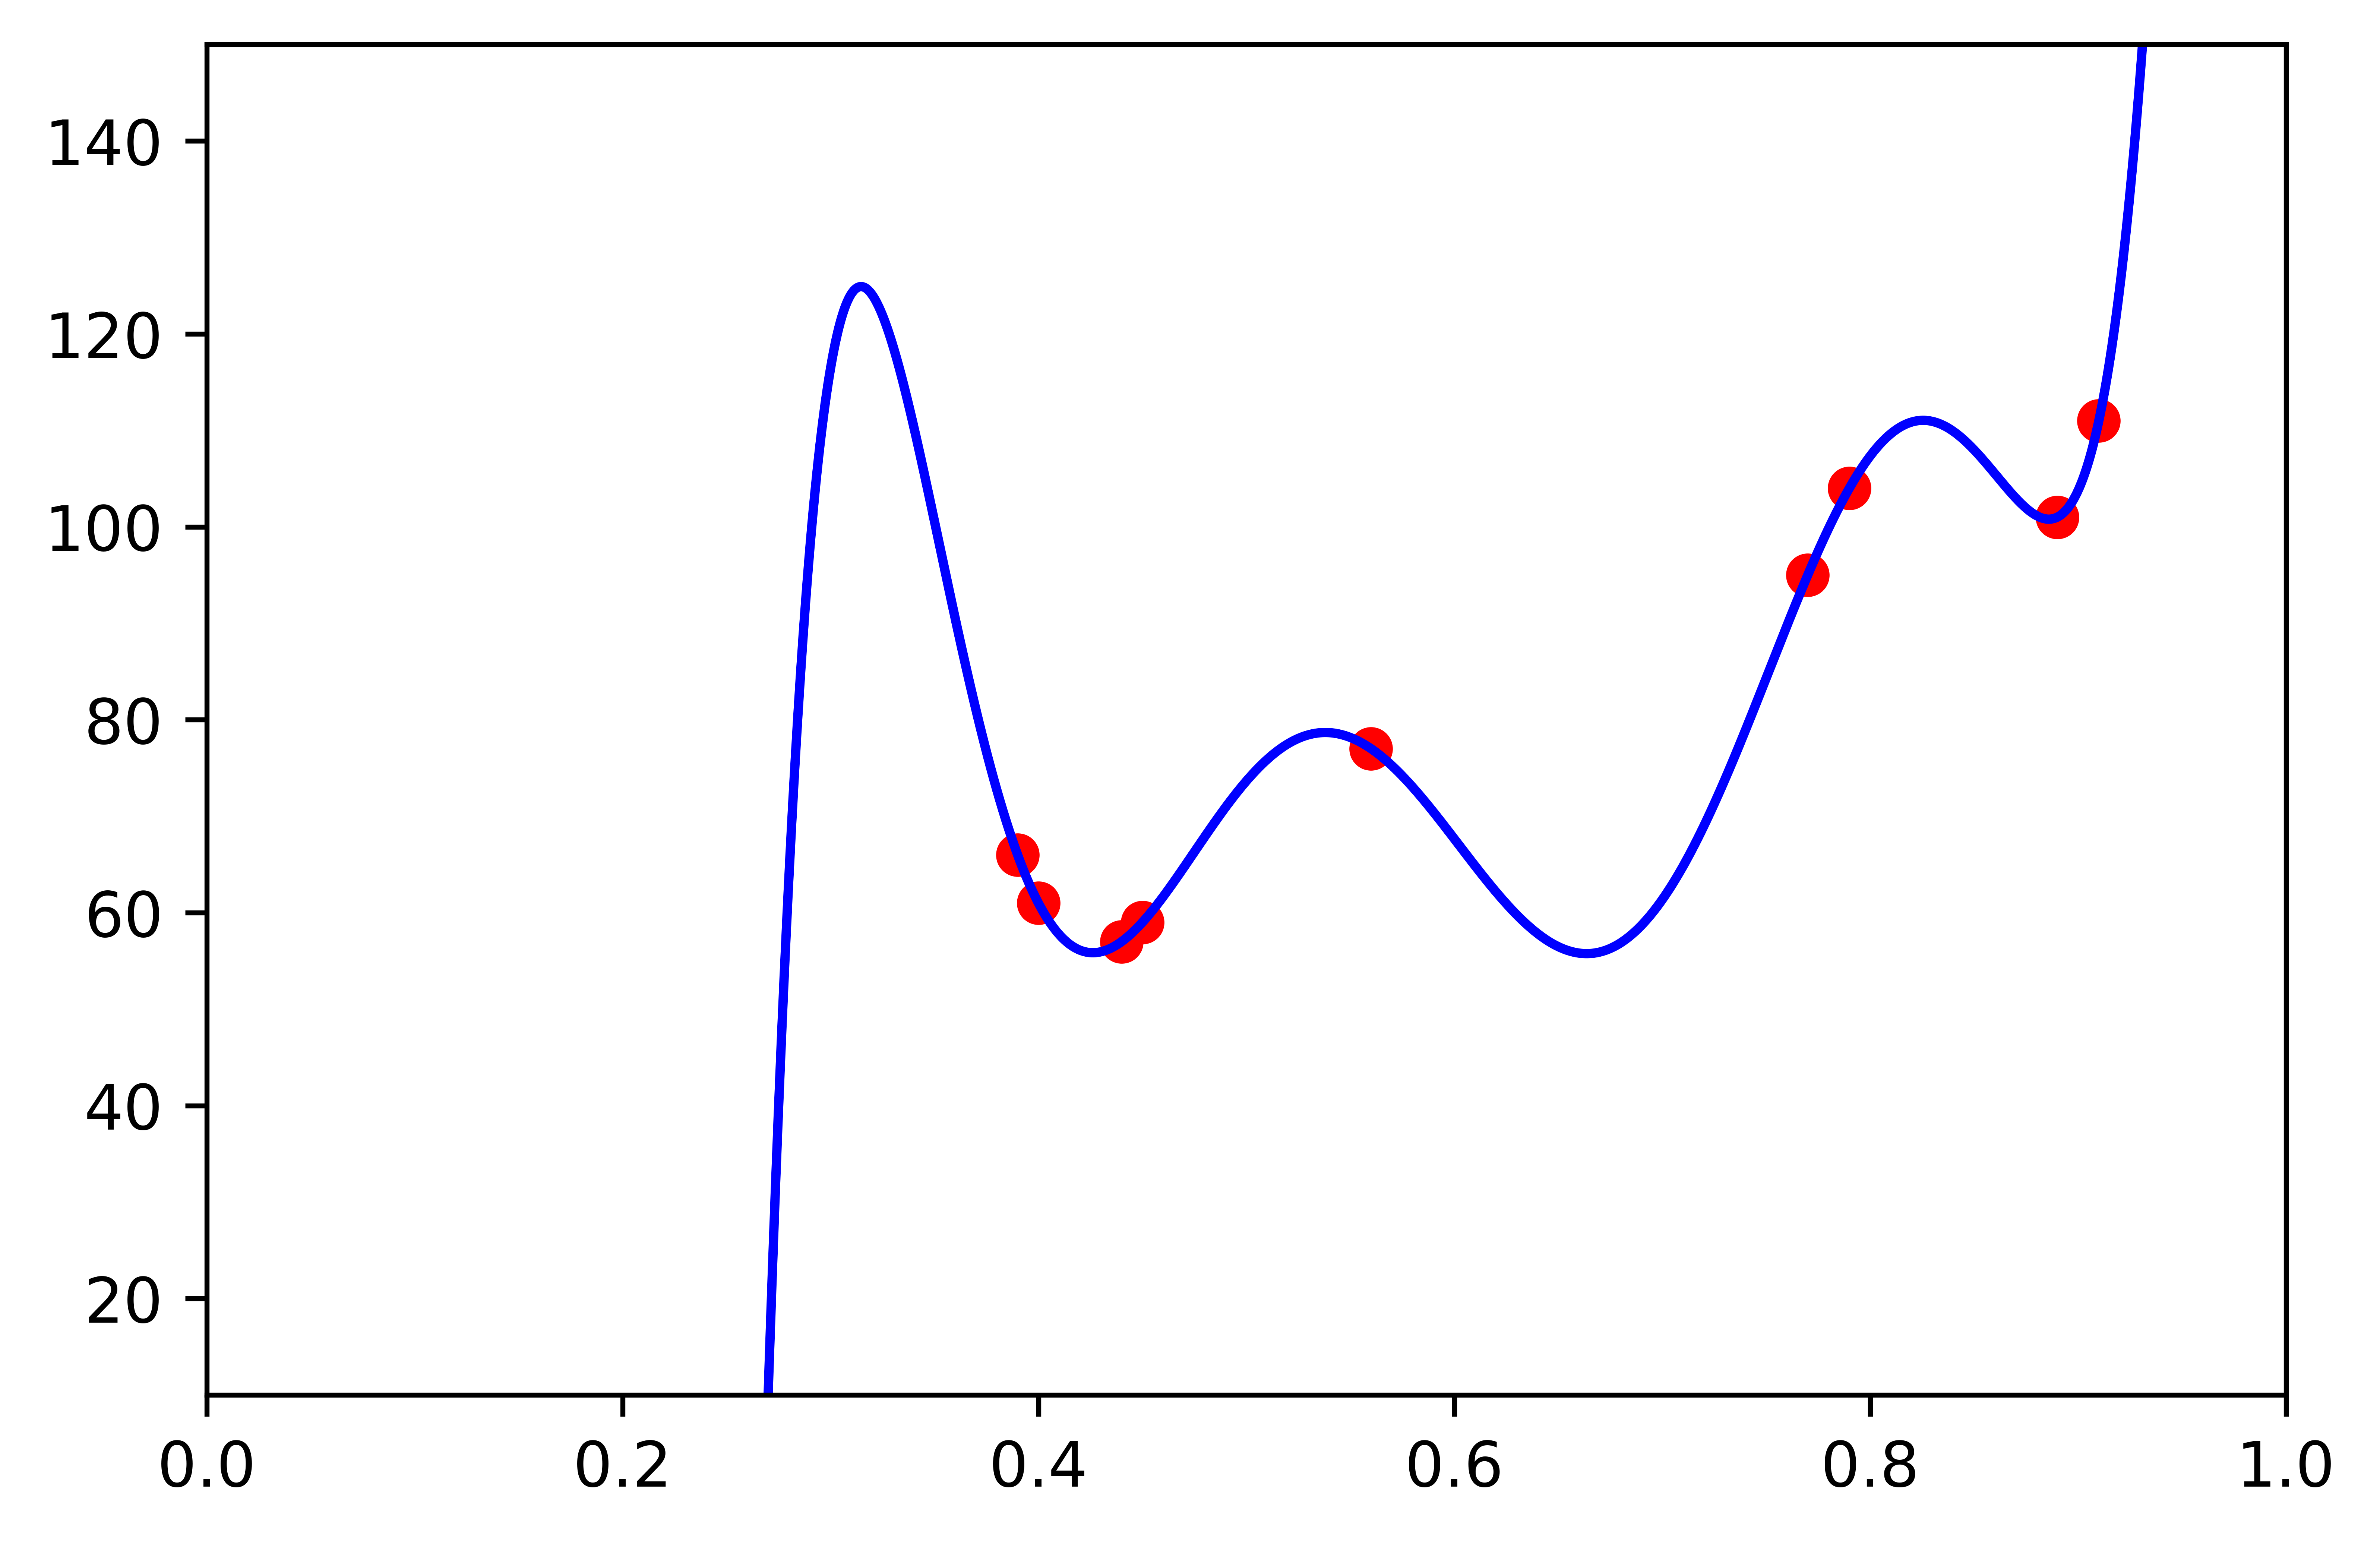

In [25]:
# Finally, we plot
plt.figure(dpi=1200)
plt.plot(mean_pupil_dilation, total_reading_time, 'ro')
plt.plot(x_curve, y_curve, 'b')

pylab.xlim([0,1])
pylab.ylim([10, 150])

### And this, my friends, is what we call _overfitting_

What is going on here? The curve above fits 100% well any of our training data points. It has zero error. The curve crosses exactly at each of the data points of our training set. But what happens when we give any of the test data points? Let's include them in the graph:

(10.0, 150.0)

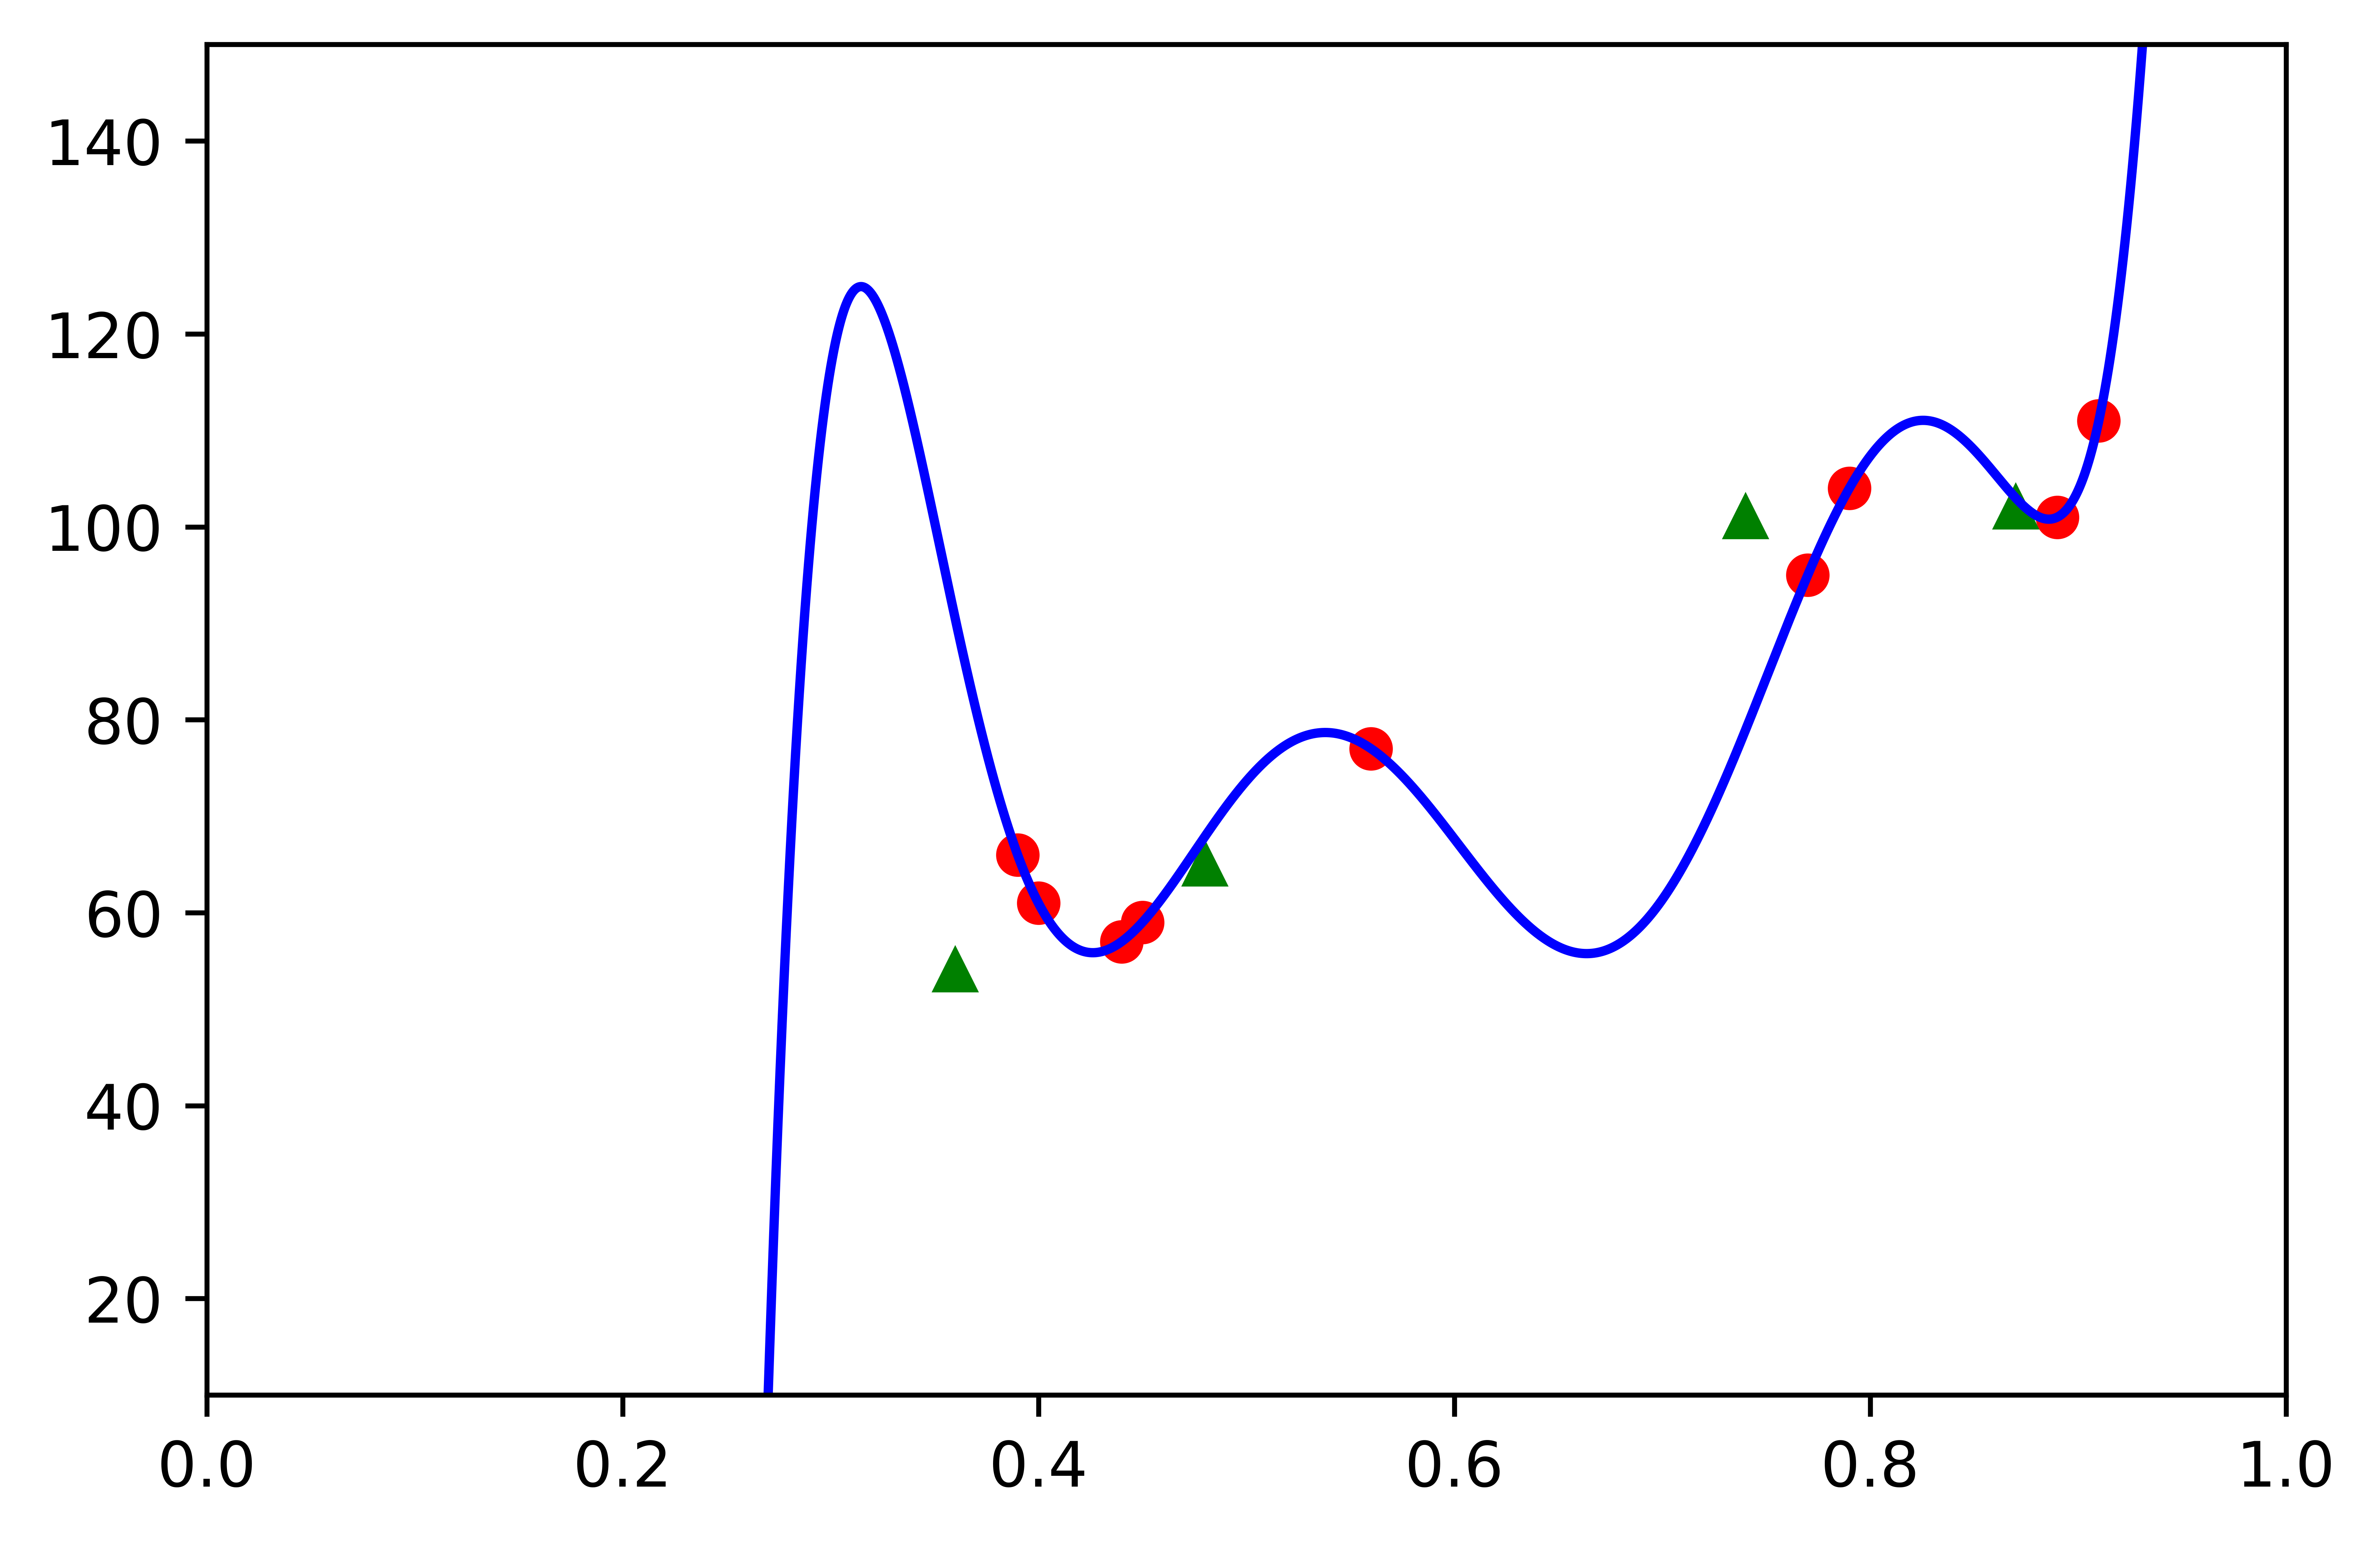

In [24]:
# Get the test data
test_mean_pupil_dilation = np.array(test_data)[:, 1].astype('float32')
test_total_reading_time  = np.array(test_data)[:, 2].astype('float32')


# Plot everything
plt.figure(dpi=1200)
plt.plot(mean_pupil_dilation, total_reading_time, 'ro')
plt.plot(test_mean_pupil_dilation, test_total_reading_time, 'g^')
plt.plot(x_curve, y_curve, 'b')

pylab.xlim([0,1])
pylab.ylim([10, 150])

As can be seen, the test data points are very far away from the fitted curve. We still were quite lucky with this test data set, but clearly this fitted curve is unable to generalize to new data. This is the phenomenon of overfitting.